### 基于逻辑回归完成信用评分卡建模
- **描述**: 信用评分卡模型在信用风险评估及金融风控领域得到广泛的应用，是一种以分数的形式来对用户进行评估的方法，通常评分越高代表用户的信用越好，从而风险也就越小
   - A卡（申请评分卡）、B卡（行为评分卡）、C卡（催收评分卡）等，三者分别侧重贷前、贷中、贷后三个阶段 
     - 申请评分卡：主要用于新用户的评级，预测用户开户后一定时间内违约拖欠的风险概率，可以有效排除信用不良客户和非目标客户。
     - 行为评分卡： 主要用于存量用户在续存期内的管理，根据用户的历史行为数据来预测该用户未来的信贷表现，例如可能出现的逾期行为。
     - 催收评分卡：主要用于存量用户是否需要催收的预测管理，预测逾期用户对催收策略反应的概率，从而采取相应催收措施。
- **数据集**:15万条用户样本，每条样本包含12列属性，分别从还款率、额度使用率、历史逾期特征、借款人信息等不同维度出发对用户进行刻画
- **方法概述**:
   - 信用评分卡模型的基本原理是对进行预处理后的数据进行分箱和WOE编码转换，
   - 通过IV值进行特征选择，并采用逻辑回归算法构建模型，用ROC曲线与AUC值进行模型评估，
   - 最终根据传统方法建立起一个简单且效果不错的信用评分系统，并最终生成评分卡。
   - 主要流程为：
     - 数据获取
     - 数据预处理
     - 特征提取
     - 特征选择
     - 模型构建
     - 模型评估
     - 生成评分卡

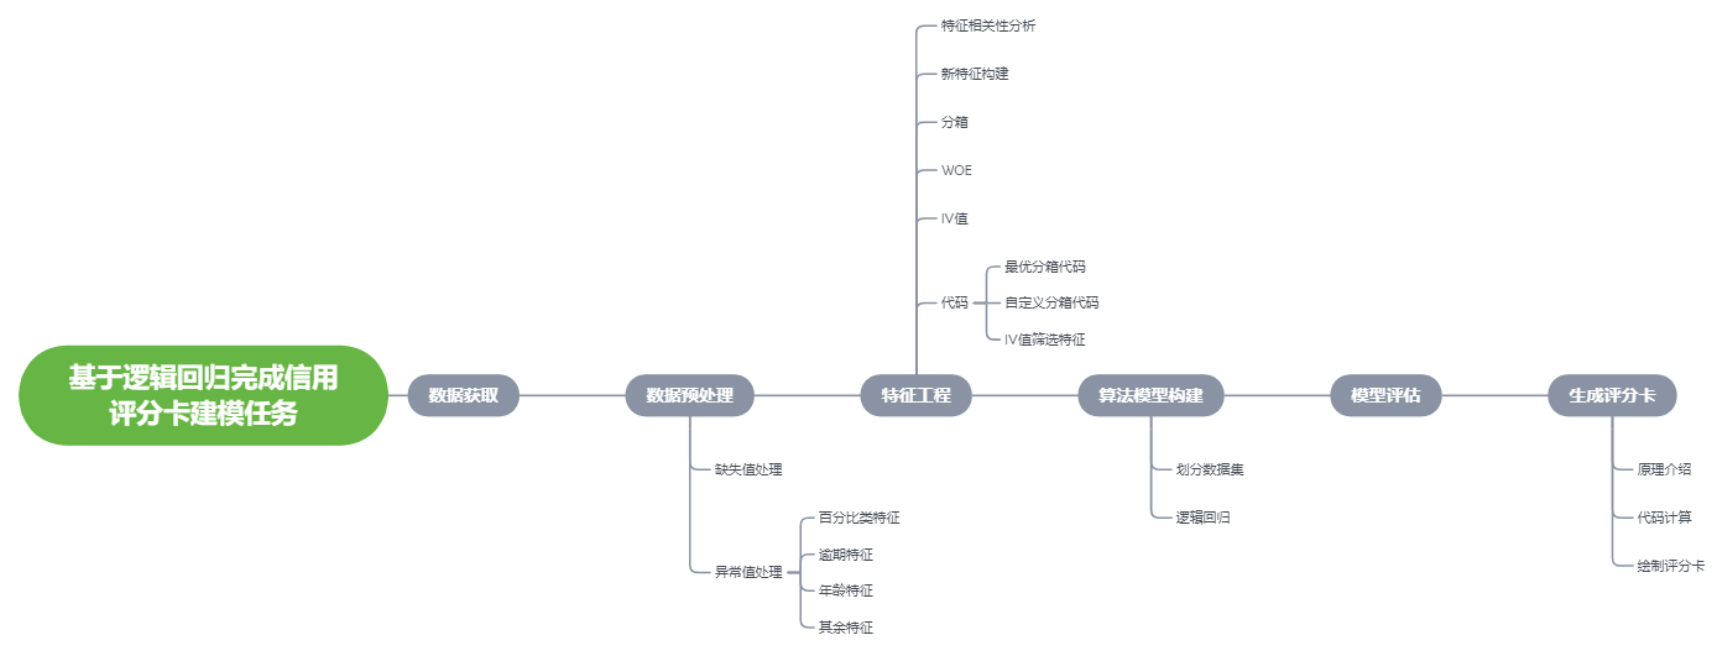

#### 数据

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./dataset/cs-training.csv')

In [3]:
data.shape

(150000, 12)

In [4]:
data.head()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0